<a href="https://colab.research.google.com/github/Rasheena-Arimbrathodi/Computer-Vision/blob/main/0_99_log_then_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from skimage.filters import sobel
from skimage.filters import gaussian
from sklearn.metrics import confusion_matrix
# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']
label = data['label']

# Smoothing using Laplacian of Gaussian approximation (Difference of Gaussians)
def laplacian_of_gaussian(image, sigma):
    gauss1 = gaussian(image, sigma)
    gauss2 = gaussian(image, sigma * np.sqrt(2))
    return gauss1 - gauss2

smoothed_normalized_T1 = np.zeros_like(T1)
for i in range(T1.shape[2]):
    smoothed_normalized_T1[:, :, i] = laplacian_of_gaussian(T1[:, :, i], sigma=0.125485)  # Adjust sigma value as needed

# Smoothing using Gaussian filter with sobel
smoothed_sobel_T1 = np.zeros_like(smoothed_normalized_T1)
for i in range(T1.shape[2]):
    smoothed_sobel_T1[:, :, i] = sobel(smoothed_normalized_T1[:, :, i])

# Flatten and cluster
kmeans = KMeans(n_clusters=6, random_state=42)
clustered_slices = np.zeros_like(T1)
for i in range(T1.shape[2]):
    flattened_slice = smoothed_sobel_T1[:, :, i].flatten().reshape((-1, 1))
    clustered_slices[:, :, i] = kmeans.fit_predict(flattened_slice).reshape(T1.shape[:2])

# Visualize clustered slices or further analysis

# Perform evaluation for Task 2
# You can compare clustered_slices with the ground truth label to assess accuracy using appropriate metrics
def evaluate_segmentation(segmented_slices, ground_truth):
    num_slices = segmented_slices.shape[2]
    all_tp = 0
    all_tn = 0
    all_fp = 0
    all_fn = 0

    for i in range(num_slices):
        segmented_slice = segmented_slices[:, :, i]
        gt_slice = ground_truth[:, :, i]

        # Compute confusion matrix
        cm = confusion_matrix(gt_slice.ravel(), segmented_slice.ravel())

        # Accumulate counts
        tn, fp, fn, tp = np.ravel(cm)[:4]  # Ensure only the first 4 elements are considered
        all_tp += tp
        all_tn += tn
        all_fp += fp
        all_fn += fn

    # Calculate macro-averaged metrics
    total_samples = all_tp + all_tn + all_fp + all_fn
    macro_accuracy = (all_tp + all_tn) / total_samples
    macro_sensitivity = all_tp / (all_tp + all_fn)
    macro_specificity = all_tn / (all_tn + all_fp)
    macro_dice = (2 * all_tp) / (2 * all_tp + all_fp + all_fn)

    return macro_accuracy, macro_sensitivity, macro_specificity, macro_dice

# Evaluate segmentation
macro_accuracy, macro_sensitivity, macro_specificity, macro_dice = evaluate_segmentation(clustered_slices, label)

print("Macro-Averaged Accuracy:", macro_accuracy)
print("Macro-Averaged Sensitivity:", macro_sensitivity)
print("Macro-Averaged Specificity:", macro_specificity)
print("Macro-Averaged Dice Coefficient:", macro_dice)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Macro-Averaged Accuracy: 0.9897487868563185
Macro-Averaged Sensitivity: 0.8905433850471661
Macro-Averaged Specificity: 0.9928788944698896
Macro-Averaged Dice Coefficient: 0.8416282925032235


In [ ]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from skimage.filters import sobel
from skimage.filters import gaussian
from sklearn.metrics import confusion_matrix

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']
label = data['label']

# Smoothing using Laplacian of Gaussian approximation (Difference of Gaussians)
def laplacian_of_gaussian(image, sigma):
    gauss1 = gaussian(image, sigma)
    gauss2 = gaussian(image, sigma * np.sqrt(2))
    return gauss1 - gauss2

smoothed_normalized_T1 = np.zeros_like(T1)
for i in range(T1.shape[2]):
    smoothed_normalized_T1[:, :, i] = laplacian_of_gaussian(T1[:, :, i], sigma=0.125485)  # Adjust sigma value as needed

# Smoothing using Gaussian filter with sobel
smoothed_sobel_T1 = np.zeros_like(smoothed_normalized_T1)
for i in range(T1.shape[2]):
    smoothed_sobel_T1[:, :, i] = sobel(smoothed_normalized_T1[:, :, i])

# Flatten and cluster
kmeans = KMeans(n_clusters=6, random_state=42)
clustered_slices = np.zeros_like(T1)
for i in range(T1.shape[2]):
    flattened_slice = smoothed_sobel_T1[:, :, i].flatten().reshape((-1, 1))
    clustered_slices[:, :, i] = kmeans.fit_predict(flattened_slice).reshape(T1.shape[:2])

# Evaluate segmentation
def evaluate_segmentation(segmented_slices, ground_truth):
    num_slices = segmented_slices.shape[2]
    all_tp = 0
    all_tn = 0
    all_fp = 0
    all_fn = 0

    for i in range(num_slices):
        segmented_slice = segmented_slices[:, :, i]
        gt_slice = ground_truth[:, :, i]

        # Compute confusion matrix
        cm = confusion_matrix(gt_slice.ravel(), segmented_slice.ravel())

        # Accumulate TP, TN, FP, FN counts
        tn, fp, fn, tp = np.ravel(cm)[:4]  # Ensure only the first 4 elements are considered
        all_tp += tp
        all_tn += tn
        all_fp += fp
        all_fn += fn

    # Calculate micro-averaged metrics
    total_samples = all_tp + all_tn + all_fp + all_fn
    micro_accuracy = (all_tp + all_tn) / total_samples
    micro_sensitivity = all_tp / (all_tp + all_fn)
    micro_specificity = all_tn / (all_tn + all_fp)
    micro_dice = (2 * all_tp) / (2 * all_tp + all_fp + all_fn)

    return micro_accuracy, micro_sensitivity, micro_specificity, micro_dice

# Evaluate segmentation
micro_accuracy, micro_sensitivity, micro_specificity, micro_dice = evaluate_segmentation(clustered_slices, label)
print("Micro-Averaged Accuracy:", micro_accuracy)
print("Micro-Averaged Sensitivity:", micro_sensitivity)
print("Micro-Averaged Specificity:", micro_specificity)
print("Micro-Averaged Dice Coefficient:", micro_dice)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Micro-Averaged Accuracy: 0.9897487868563185
Micro-Averaged Sensitivity: 0.8905433850471661
Micro-Averaged Specificity: 0.9928788944698896
Micro-Averaged Dice Coefficient: 0.8416282925032235


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

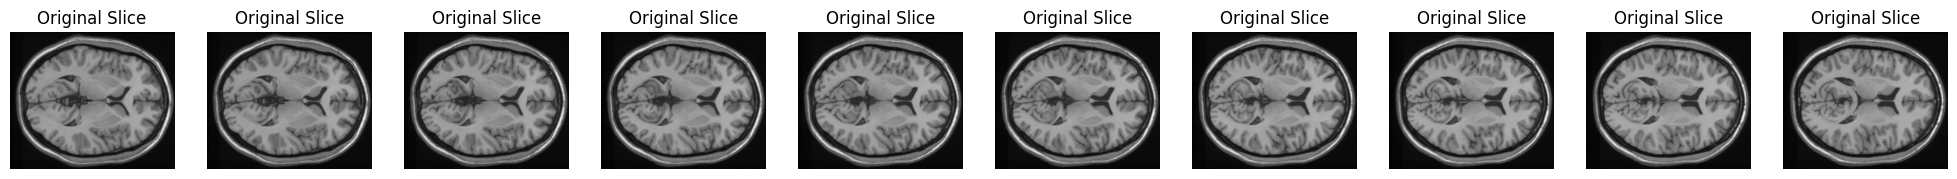

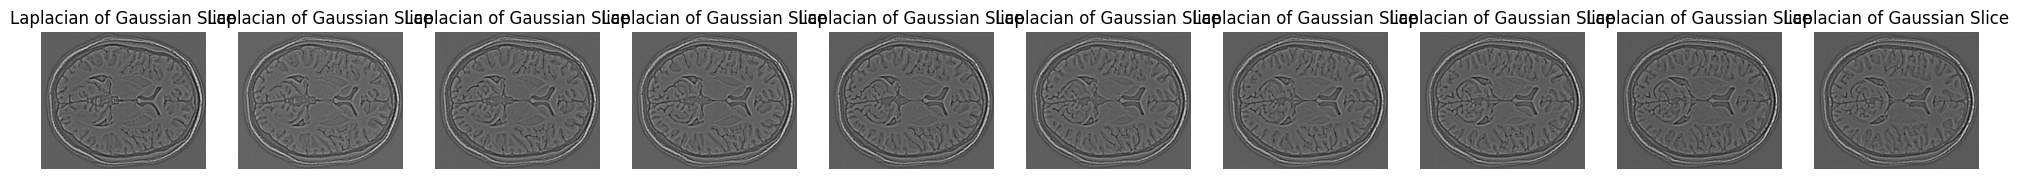

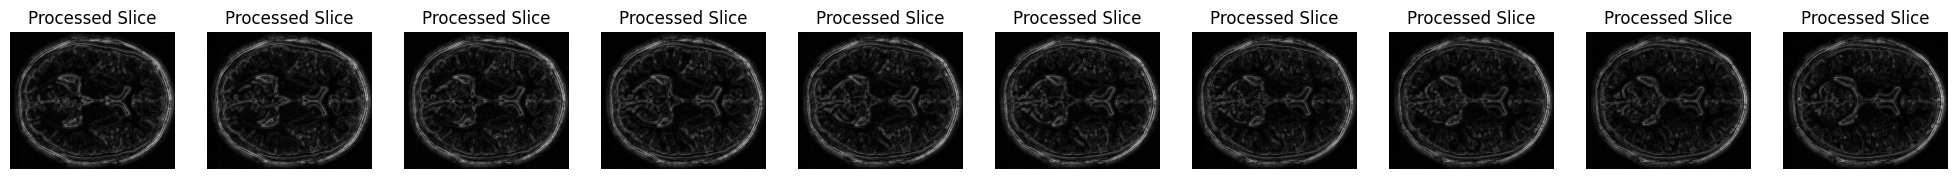

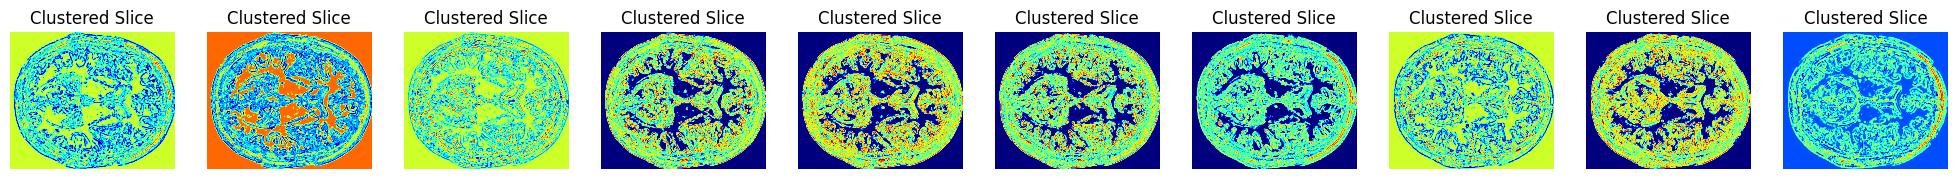

In [ ]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from skimage.filters import sobel
from skimage.filters import gaussian
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load MRI data
data = loadmat('Brain.mat')
T1 = data['T1']
label = data['label']

# Smoothing using Laplacian of Gaussian approximation (Difference of Gaussians)
def laplacian_of_gaussian(image, sigma):
    gauss1 = gaussian(image, sigma)
    gauss2 = gaussian(image, sigma * np.sqrt(2))
    return gauss1 - gauss2

smoothed_normalized_T1 = np.zeros_like(T1)
for i in range(T1.shape[2]):
    smoothed_normalized_T1[:, :, i] = laplacian_of_gaussian(T1[:, :, i], sigma=1.25)  # Adjust sigma value as needed

# Smoothing using Gaussian filter with Sobel
smoothed_sobel_T1 = np.zeros_like(smoothed_normalized_T1)
for i in range(T1.shape[2]):
    smoothed_sobel_T1[:, :, i] = sobel(smoothed_normalized_T1[:, :, i])

# Flatten and cluster
kmeans = KMeans(n_clusters=6, random_state=42)
clustered_slices = np.zeros_like(T1)
for i in range(T1.shape[2]):
    flattened_slice = smoothed_sobel_T1[:, :, i].flatten().reshape((-1, 1))
    clustered_slices[:, :, i] = kmeans.fit_predict(flattened_slice).reshape(T1.shape[:2])


# Visualize original slices
def visualize_slices(images, titles, cmap='gray'):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(25, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap=cmap)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Original slices
visualize_slices([T1[:, :, i] for i in range(T1.shape[2])], titles=['Original Slice'] * T1.shape[2])

# Slices after Laplacian of Gaussian
visualize_slices([smoothed_normalized_T1[:, :, i] for i in range(smoothed_normalized_T1.shape[2])], titles=['Laplacian of Gaussian Slice'] * T1.shape[2])

# Slices after Laplacian of Gaussian and Sobel
visualize_slices([smoothed_sobel_T1[:, :, i] for i in range(smoothed_sobel_T1.shape[2])], titles=['Processed Slice'] * T1.shape[2])

# Clustered slices
visualize_slices([clustered_slices[:, :, i] for i in range(clustered_slices.shape[2])], titles=['Clustered Slice'] * T1.shape[2], cmap='jet')

